In [53]:
#!pip3 install mlxtend

In [25]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
knn = KNeighborsClassifier(n_neighbors=4)

In [64]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Parameters to understand

sfs = SFS(knn, 
          k_features=3, 
          forward=False, 
          floating=True, 
          scoring='accuracy',
          cv=3,
          n_jobs=-1)
feature_names = ('sepal length', 'sepal width', 'petal length', 'petal width')
sfs = sfs.fit(X, y,custom_feature_names=feature_names)

In [65]:
import pandas as pd
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
4,"(0, 1, 2, 3)","[0.98, 1.0, 0.98]",0.986667,"(sepal length, sepal width, petal length, peta...",0.0212163,0.00942809,0.00666667
3,"(1, 2, 3)","[0.98, 0.98, 0.96]",0.973333,"(sepal width, petal length, petal width)",0.0212163,0.00942809,0.00666667


# Check the page

In [6]:
#http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/?msclkid=bd438f62ae9a11ecb61982e554e0e047

# RECURSIVE FEATURE ELIMINATION
#Feature ranking with recursive feature elimination and cross-validated selection of the best number of features

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()

# Load the dataset into Pandas Dataframe
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['Price'] = pd.Series(boston_pd_target)
 
# input
X = boston_pd.iloc[:, :-1]
 
#output
Y = boston_pd.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    boston_pd.iloc[:, :-1], boston_pd.iloc[:, -1],
    test_size = 0.20)

 
print(boston_pd.head())

X, y = x_train, y_train

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV


lin_reg = LinearRegression()

rfe_mod = RFECV(lin_reg,cv=2) 
myvalues=rfe_mod.fit(X,y) 
myvalues.support_
myvalues.ranking_ 

print("Num Features: %s" % (myvalues.n_features_))
print("Selected Features: %s" % (myvalues.support_))
print("Feature Ranking: %s" % (myvalues.ranking_))  

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
Num Features: 13
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1]


# Using Models to select features - Embedded Methods

In [68]:

from sklearn.linear_model import Lasso
 

lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)
 

mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("MSE on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
 
print(lasso_coeff)

MSE on test set 21.717492247200703
    Columns  Coefficient Estimate
0      CRIM             -0.045348
1        ZN              0.048966
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              0.843618
6       AGE              0.029624
7       DIS             -0.560082
8       RAD              0.287359
9       TAX             -0.016186
10  PTRATIO             -0.838047
11        B              0.007720
12    LSTAT             -0.802309


# Using Random Forest to Select features

In [69]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100,random_state=42)
rf.fit(x_train, y_train)
importances = rf.feature_importances_

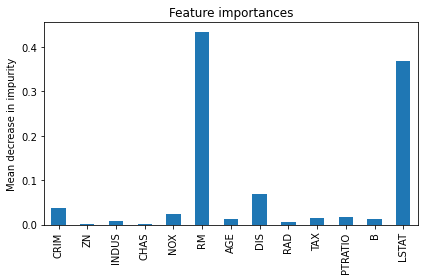

In [70]:
forest_importances = pd.Series(importances, index=x_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
